In [13]:
import sys 
sys.path.insert(0,"/gpfswork/rech/omr/uen17sn/NewSpinUp/lib/sklearnGPmodel")
sys.path.insert(0,"/gpfswork/rech/omr/uen17sn/NewSpinUp/lib")
import sklearnGPmodel as skgp
import analyseModel as analyse

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed, parallel_backend

import importlib
importlib.reload(skgp)
importlib.reload(analyse)

<module 'analyseModel' from '/gpfswork/rech/omr/uen17sn/NewSpinUp/lib/analyseModel.py'>

## **Simulation Loading**

In [5]:
simu_nb = 204

In [6]:
df = pd.read_csv(f"/gpfswork/rech/omr/uen17sn/NewSpinUp/datasets/yearly/dataFrame/simu{simu_nb}")
df.shape

(600, 18)

In [7]:
df

,Unnamed: 0,MSFT-1,MSFT-2,MSFT-3,MSFT-4,MSFT-5,MSFT-6,MSFT-7,MSFT-8,MSFT-9,MSFT-10,MSFT-11,MSFT-12,MSFT-13,MSFT-14,MSFT-15,MSFT-16,MSFT-17
0,0,19.270443,2.142370,0.393435,0.900593,1.674075,0.656456,0.697247,0.299805,-2.402743,0.250962,-0.692004,-0.592743,-1.282935,2.066055,-1.230658,1.050119,0.626496
1,1,18.126086,-0.317462,1.876019,-2.290273,1.152702,-2.839545,0.043029,0.230378,-2.881111,0.739010,-0.662857,1.469690,-2.224213,1.880381,-1.237545,-0.457881,0.177222
2,2,19.799096,4.408964,2.863528,0.156425,1.995186,1.479123,-0.352089,2.045279,-3.024101,1.110103,-1.412786,1.121846,-0.853135,1.741023,0.928641,-1.775934,1.091334
3,3,18.021828,2.703452,0.278213,-0.685550,0.850088,2.022986,0.541819,0.463398,-2.676218,2.447300,-1.699289,-0.256894,-0.720332,1.380011,-0.863466,-0.841869,0.206651
4,4,18.324972,-1.704952,2.662613,-0.800777,1.806584,0.453126,1.556290,-0.343425,-1.930756,1.832212,-2.703416,0.217363,-0.265366,0.658164,-1.171646,-0.402770,-0.508395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,-7.865353,-2.516719,1.852746,-3.361166,-0.309828,0.956749,-0.625544,-0.893437,0.432137,-0.734797,0.971754,-1.005932,-0.141217,0.605322,-0.086860,-0.821845,-0.270445
596,596,-14.660176,-0.893286,0.684826,0.750066,0.664466,-0.914125,-1.791526,0.358435,1.359398,-0.835893,-0.804724,-0.294809,-1.122392,1.298026,-0.262206,-1.816000,-0.618881
597,597,-11.637559,4.705814,-0.354740,-2.540747,0.600750,0.186076,-0.940802,0.300413,0.596932,-0.554778,-0.119186,0.140601,-1.652222,0.334938,0.459905,-0.485895,0.592557
598,598,-12.735922,-1.051270,-0.749646,0.335014,0.205789,1.875127,0.478309,-0.556110,0.221827,-1.353561,0.608779,0.055874,-1.455476,0.512154,-0.364183,0.155810,0.770345


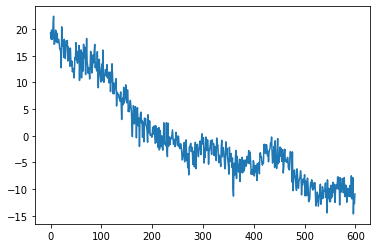

In [8]:
plt.plot(df["MSFT-1"])

## **Forecast one simu and one EOF**

### 2.1 - Select parameters

In [9]:
gp_model    = skgp.defineGP()
eof1        = df["MSFT-1"]
norm        = True
window_size = 16  ### what we want to forecast mean or mean + variance ??
y           = window_size//2
show        = True
f           = 1.96 #intervalle de confiance 90% des valeurs plus proche moy #1.96
out         = 5 #Number of predictions out of the intervalle ok before not ok

### 2.2 - Apply Regression model

In [10]:
importlib.reload(skgp)

<module 'sklearnGPmodel' from '/gpfswork/rech/omr/uen17sn/NewSpinUp/lib/sklearnGPmodel/sklearnGPmodel.py'>

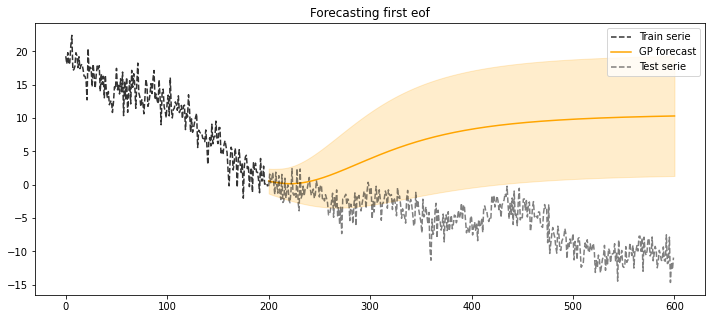

In [12]:
train_len = 200
steps     = 1

mean_preds,std_preds,metrics = skgp.predict(eof       = eof1,
                                            train_len = train_len,
                                            process   = gp_model,
                                            steps     = steps,
                                            norm      = norm,
                                            show      = show,
                                            w         = window_size)

### 2.4 - Observe score 

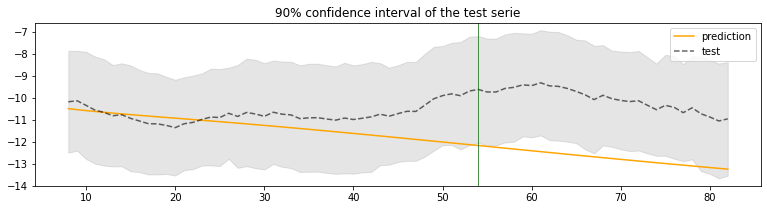

In [77]:
correct_years = analyse.goodPred(metrics,out=5,f=1.96,evaluation_method="std")


fig  = plt.figure(figsize=(13,3))  

axis = np.arange(y,(len(metrics["ma_pred"])+y))
plt.plot(axis, metrics["ma_pred"], color="orange",label="prediction")
plt.plot(axis, metrics["ma_true"], linestyle="dashed",color="black",alpha=0.6,label="test")
plt.fill_between(
    axis,
    metrics["ma_true"]-f*np.sqrt(metrics["std_true"]),
    metrics["ma_true"]+f*np.sqrt(metrics["std_true"]),
    color = "tab:grey",
    alpha = 0.2)  

plt.axvline(correct_years,color = "darkgreen",linewidth=0.7)

plt.legend()
plt.title(f"90% confidence interval of the test serie");

## **Analyse Models**

### 3.1 - Analyse correct predictions

In [ ]:
steps      = 1
f          = 1.96
train_lens = np.arange(60,545,1)
res1       = []

results      = Parallel(n_jobs=10)(delayed(skgp.predict)(eof1,i,gp_model,steps,show=False,w=16) for i in train_lens)          
correct_pred = [analyse.goodPred(results[i][2],out=5,f=f) for i in range(len(train_lens))] 

In [73]:
print(f"Nb of samples: {len(correct_pred)}")
print(f"Average nb of years correctly pred: {np.mean(correct_pred)}")
print()
tri    = sorted(correct_pred)
values = [0.1,0.25,0.5,0.75,0.95]
for val in values:
    ye = tri[int(len(tri) * val)]
    print(f"{val*100}% of correct predictions < {ye} years")

Nb of samples: 485
Average nb of years correctly pred: 53.61237113402062

10.0% of correct predictions < 14 years
25.0% of correct predictions < 20 years
50.0% of correct predictions < 33 years
75.0% of correct predictions < 67 years
95.0% of correct predictions < 175 years


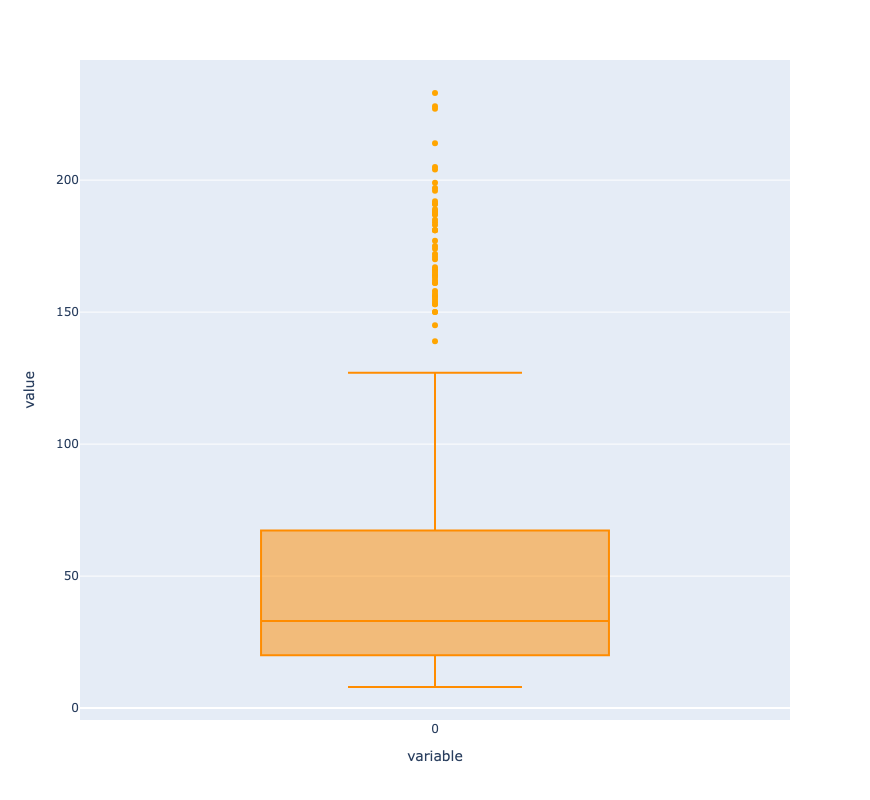

<Figure size 720x360 with 0 Axes>

In [110]:
import plotly.express as px
fig = plt.figure(figsize=(10,5))

fig = px.box(correct_pred, width=400, height=800)

# Mise à jour de la couleur du tracé
fig.update_traces(marker_color='orange', line_color='darkorange')


# Affichage de la figure
fig.show()

In [74]:
r=np.array(correct_pred)
print("8 à 18 ans:    ",np.count_nonzero((r > 0)  & (r <= 8)) /len(r)*100,"%")
print("8 à 18 ans:    ",np.count_nonzero((r > np.mean(correct_pred))) /len(r)*100,"%")

8 à 18 ans:     2.4742268041237114 %
8 à 18 ans:     32.577319587628864 %


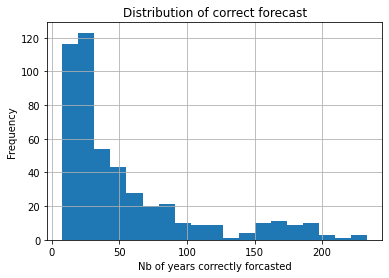

In [75]:
plt.hist(correct_pred, bins='auto')
plt.title('Distribution of correct forecast')
plt.xlabel('Nb of years correctly forcasted')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

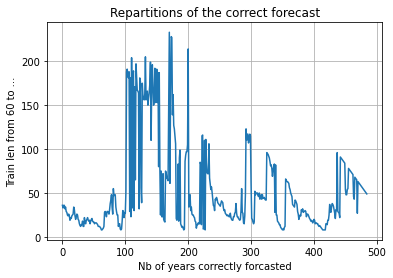

In [76]:
plt.plot(correct_pred)
plt.title('Repartitions of the correct forecast')
plt.xlabel('Nb of years correctly forcasted')
plt.ylabel('Train len from 60 to ...')
plt.grid(True)
plt.show()